**Problem 3.1** (3 pts)

In this problem we consider univariate function $f:\mathbb R\to\mathbb R$.
Let us remind the idea of bracketing method
> _Bracketing_ is the process of identifying an interval in which a local minimum lies and then successively shrinking the interval.

Implement the method `(a,b) = find_initial_bracket(f)` which for given function $f$ gives the bracketing interval $(a,b)$ such that there exist local minimum $c\in(a,b)$ satisfying $f(a)>f(c)<f(b)$.

In [83]:
def find_initial_bracket(f, direction, x=0, s=1e-2, k=2.0):
    ''' Finds the interval bounding the local (or global) minimum of a given function
    INPUT:
    - f; function of which the local minimum is to be found
    - direction; takes value of 1 or -1, indicates in which direction (+ve or -ve respectively)
    the search is conducted
    - x; initial point (default = 0)
    - s; initial step size (default = 1e-2)
    - k;, constant that we multiply s with after each iteration
    OUTPUT:
    - tuple with initial interval in which the local minima is found
    '''
    assert direction in [-1, 1], "direction argument should be either 1 or -1"
    s = direction * s
    bracket = [x, x + s]
    values = [f(x), f(x + s)]
    while True:
        s *= k
        x = x + s
        try:
            val = f(x)
        except OverflowError as err:
            print('It seems that f does not have a minimum in the direction of', direction)
            bracket[-1] = "Try"
            bracket[-3] = "again?"
            break
        if val > values[-1]:
            bracket.append(x)
            break
        bracket.append(x)
        values.append(val)
    return(bracket[-1], bracket[-3])

-5.1 -1.2600000000000002


(-55, -40)

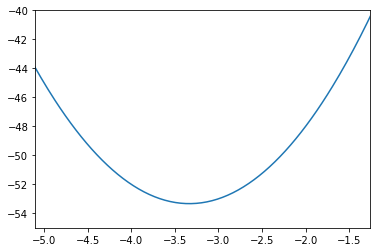

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# define the test function from the task
def test_f(x):
    return 3*x**2 + np.exp(0.3*x - 9) + 20*x - 20

# test our bracketing function with the provided test function
a, b = find_initial_bracket(f = test_f, direction = -1)
print(a,b)
domain = np.linspace(-10,10,1000)

# plot to see if we got it right
plt.figure()
plt.plot(domain, test_f(domain))
plt.xlim(a, b)
plt.ylim(-55, -40)

# the analytic minimum is at x = -3.3333..., clearly lying within the computed interval 

-0.30000000000000004 -0.06


Text(0.5, 1.0, 'Bounded minimum of 5*x**2 + 2*x + 5')

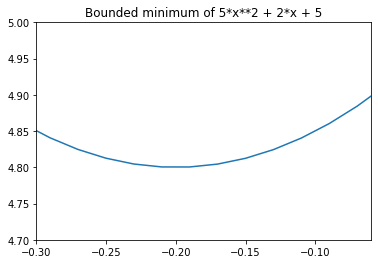

In [3]:
# further test our bracketing function with some simple quadratic
def quadratic(x):
    return 5*x**2 + 2*x + 5

a_q, b_q = find_initial_bracket(f = quadratic, direction = -1)
print(a_q, b_q)

# plot to see if we got it right

plt.figure()
plt.plot(domain, quadratic(domain))
plt.xlim(a_q, b_q)
plt.ylim(4.7, 5)
plt.title("Bounded minimum of 5*x**2 + 2*x + 5")

# the analytic minimum is at x = -0.2, clearly lying within the computed interval 

-1.2600000000000002 -0.30000000000000004


Text(0.5, 1.0, 'Bounded minimum of x**4 + 2*x**2 + 5*x')

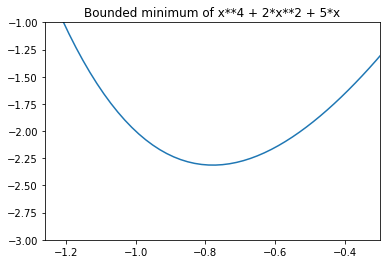

In [4]:
# further test our bracketing function
def quad(x):
    return x**4 + 2*x**2 + 5*x

a_quad, b_quad = find_initial_bracket(f = quad, direction = -1)
print(a_quad, b_quad)

# plot to see if we got it right

plt.figure()
plt.plot(domain, quad(domain))
plt.xlim(a_quad, b_quad)
plt.ylim(-3,-1)
plt.title("Bounded minimum of x**4 + 2*x**2 + 5*x")

# the analytic minimum is at roughly x = -0.778, clearly lying within the computed interval 

In [84]:
# further test our bracketing function, now with a function without a minimum
def concave_quadratic(x):
    return -5*x**2 + 2*x + 5

a_cq, b_cq = find_initial_bracket(f = concave_quadratic, direction = -1)
print(a_cq, b_cq)

# expect to encounter an overflow error, which should be handled by the exception

It seems that f does not have a minimum in the direction of -1
Try again?


The important note regarding our function is that it requires some **prior knowledge** about the direction (towards either decreasing or increasing x) in which we should proceed with iterations from the initial point to obtain the bounded minimum. Alternatively, we could develop the function so that it performs the search in both directions and returns the bounded interval containing the first encountered minimum.

**Problem 3.2** (4 pts)

In this problem we consider [unimodal function](https://www.wikiwand.com/en/Unimodality#/Unimodal_function)
and will play with _golden section search_ method.

First you should implement the _Fibonacci search_ algorithm provided that you have the (global) array of Fibonacci numbers. Next you should implement the _golden section search_ which uses only _golden ratio_ $\varphi = (1+\sqrt 5)/2$.

* Implement the [Fibonacci search algorithm](https://www.wikiwand.com/en/Golden-section_search#/Fibonacci_search)<br/>`(a, b) = fibonacci_search(f, a, b, n; ε=1e-4)`<br/>to be run on univariate function $f$, with bracketing interval $[a, b]$, for $n > 1$ function evaluations. It should return the new interval $(a, b)$. The optional parameter $\varepsilon$ should control the lowest-level interval length.
* Implement [Golden section search](https://www.wikiwand.com/en/Golden-section_search#)<br/>`(a, b) = gs_search(f, a, b, n)`<br/> to be run on a univariate function $f$ , with bracketing interval $[a, b]$ , for $n > 1$ function evaluations. It returns the new interval $(a, b)$. Guaranteeing convergence to within $\varepsilon$ requires $n = (b-a)/(\varepsilon \ln\varphi)$.

Present the results on various kind of functions.

References:
- [Fibonacci Search in Optimization of Unimodal Functions](https://www.maplesoft.com/applications/view.aspx?SID=4193&view=html)
- [Golden section search](https://www.wikiwand.com/en/Golden-section_search#)

In [54]:
def fibonacci_search(f, a, b, eps=1e-4):
    # provide the "global" array of Fibonacci numbers
    Fibonacci = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377,
                 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 
                 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 
                 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 
                 63245986, 102334155]
    Fibonacci = [float(i) for i in Fibonacci]
    # set up the initial interval
    interval = [a,b]
    # compute the value which must be smaller than the first Fibonacci number
    comp = (b-a)/eps
    i = 0
    while Fibonacci[i] < comp:
        i += 1
    n = i
    c = interval[0] + (Fibonacci[i-2]/Fibonacci[i]) * (interval[1] - interval[0])
    d = interval[0] + (Fibonacci[i-1]/Fibonacci[i]) * (interval[1] - interval[0])
    fc = f(c)
    fd = f(d)
    while i > 2:
        i -= 1
        if fc < fd:
            interval[1] = d
            d = c
            fd = fc
            c = interval[0] + (Fibonacci[i-2]/Fibonacci[i]) * (interval[1] - interval[0])
            fc = f(c)
        else:
            interval[0] = c
            c = d
            fc = fd
            d = interval[0] + (Fibonacci[i-1]/Fibonacci[i]) * (interval[1] - interval[0])
            fd = f(d)
    return(interval[0], interval[1], n)

In [63]:
# come up with new functions apart from the already defined to be tested
def absol(x):
    return np.absolute(x-1) + 0.5



functions = [np.cosh, test_f, quadratic, quad, absol]
results_fibonacci = {}
#plt.figure()
#fig, ax = plt.subplots(nrows = 2, ncols = (len(functions) - len(functions)%2)/2 + 1)
for func in functions:
    a,b,nsteps = fibonacci_search(func, -100.0, 100.0)
    name = str(func)
    results_fibonacci[func] = np.array([a,b,steps])
results_fibonacci

{<ufunc 'cosh'>: array([4.59071693e-05, 1.37721508e-04, 2.60000000e+01]),
 <function __main__.test_f(x)>: array([-3.33336547, -3.33327365, 26.        ]),
 <function __main__.quadratic(x)>: array([-0.20001754, -0.19992572, 26.        ]),
 <function __main__.quad(x)>: array([-0.77835606, -0.77826424, 26.        ]),
 <function __main__.absol(x)>: array([ 0.99999587,  1.00008768, 26.        ])}

In [34]:
str(absol)

'<function absol at 0x000002620B1191F8>'

In [65]:
def gs_search(f, a, b, eps=1e-4):
    # get the golden ration
    gold = (1 + np.sqrt(5))/2
    # define initial bracket
    interval = [a,b]
    c = interval[1] + (interval[0] - interval[1]) / gold
    d = interval[0] + (interval[1] - interval[0]) / gold
    fc = f(c)
    fd = f(d)
    i = 0
    while interval[1] - interval[0] > eps:
        i += 1
        if fc < fd:
            interval[1] = d
            d = c
            fd = fc
            c = interval[1] + (interval[0] - interval[1]) / gold
            fc = f(c)
        else:
            interval[0] = c
            c = d
            fc = fd
            d = interval[0] + (interval[1] - interval[0]) / gold
            fd = f(d)
    required_n = (b-a)/(eps*np.log(gold))
    return(interval[0], interval[1], i, required_n)

In [67]:
results_gss = {}
#plt.figure()
#fig, ax = plt.subplots(nrows = 2, ncols = (len(functions) - len(functions)%2)/2 + 1)
for func in functions:
    a,b, steps, n = gs_search(func, -5.0, 5.0)
    name = str(func)
    results_gss[func] = np.array([a,b, steps, n])
results_gss

{<ufunc 'cosh'>: array([-4.82243784e-05,  4.82243784e-05,  2.40000000e+01,  2.07808692e+05]),
 <function __main__.test_f(x)>: array([-3.33340902e+00, -3.33331257e+00,  2.40000000e+01,  2.07808692e+05]),
 <function __main__.quadratic(x)>: array([-2.00038150e-01, -1.99941701e-01,  2.40000000e+01,  2.07808692e+05]),
 <function __main__.quad(x)>: array([-7.78436437e-01, -7.78339988e-01,  2.40000000e+01,  2.07808692e+05]),
 <function __main__.absol(x)>: array([9.99952313e-01, 1.00004876e+00, 2.40000000e+01, 2.07808692e+05])}

**Problem 3.3 (5 pts)**
Consider the [Rosenbrock's function](https://www.wikiwand.com/en/Rosenbrock_function)
$$ f(x_1, x_2) = 100(x_2-x_1^2)^2 + (1-x_1)^2 $$
1. (3 pts) Implement the function that takes the (column) vector $x\in \mathbb R^2$ and returns the value, gradient and Hessian matrix of the Rosenbrock's function at point $x$.

In [4]:
# define a function which computes the value, gradient and hessian matrix of the Rosenbrock's
# function at point x from R^2

def rosenbrock(x):
    ''' Computes the value, gradient and hessian matrix of the Rosenbrock's function at point x
    INPUT: 
    - x, a 2-dimensional column vector with point coordinates
    OUTPUT: a tuple with
    - value of the rosenbrock function at point x
    - gradient of the rosenbrok function at point x
    - hessian matrix of the rosenbrock function at point x
    '''
    # compute value at x 
    value = (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
    # compute the gradient at x, grad(f) = (df/dx_1, df/dx_2)
    dfdx = -2 + 2 * x[0] - 400 * x[0] * (x[1] - x[0]**2)
    dfdy = 200 * (x[1] - x[0]**2)
    grad = np.array([dfdx, dfdy])
    # compute the hessian, Hf(x) 
    d2fdx2 = -400 * x[1] + 1200 * x[0]**2 + 2 
    d2fdy2 = -200
    d2fdxdy = -400 * x[0]
    H = np.array([[d2fdx2, d2fdxdy], [d2fdxdy, d2fdy2]])
    return(value, grad, H)

2. (2 pts) Plot the following graphs:
  * contours
  * 3-dimensional view of the surface

(-3, 3)

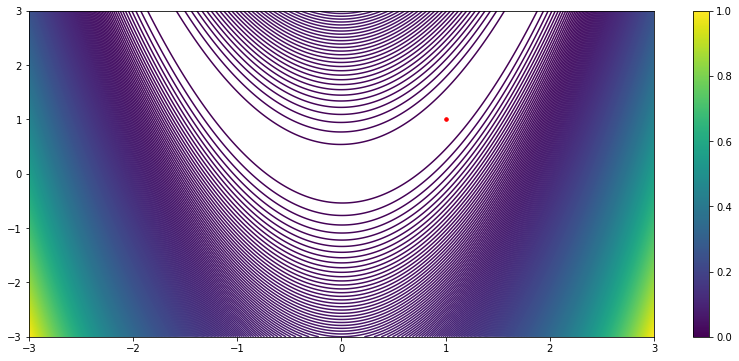

In [5]:
# initialize the domain
x = np.arange(-3.0, 3.01, 0.01)
xx, yy  = np.meshgrid(x, x)
z = np.array([xx, yy]).reshape(2, -1)

# get values 
values = rosenbrock(z)[0]

# plot the contours
plt.figure(figsize = (14,6))
plt.contour(xx, yy, values.reshape(xx.shape), 500)
plt.scatter(1,1, marker = ".", color = 'red', s = 50)
plt.colorbar()
plt.xlim(-3,3)
plt.ylim(-3,3)

Our version of the Rosenbrock has a global minimum at $(x_1, x_2)$ = $(1, 1^2)$ with $f(x_1,x_2)=0$.
The position of the minimum has been plotted alongside the Rosenbrock contours, marked with a red dot.
Clearly, the minimum lies within the parabolic-shaped "valley" 

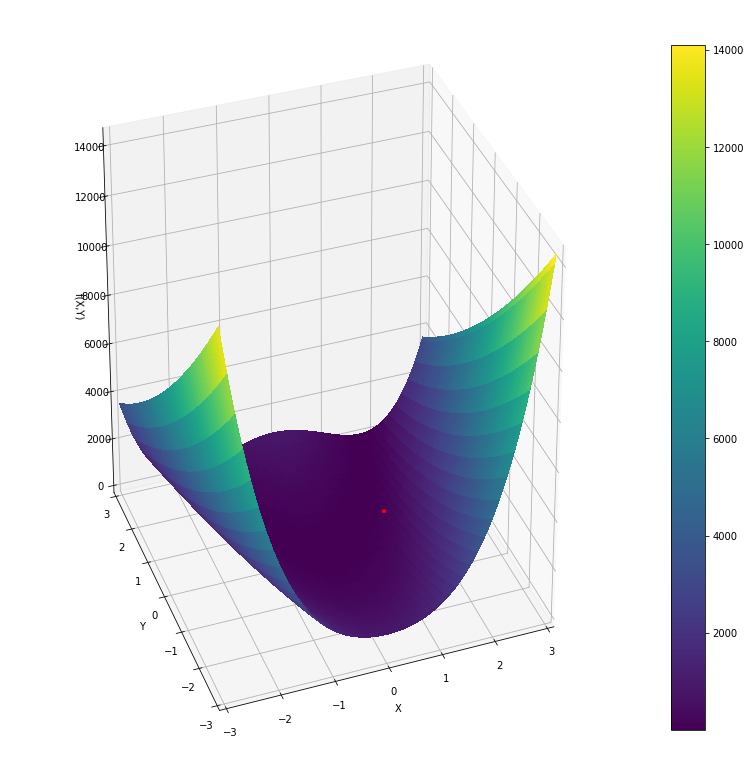

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Plot the surface
fig = plt.figure(figsize = (14,14))
ax = fig.gca(projection='3d')

plot = ax.plot_surface(xx, yy, values.reshape(xx.shape), cmap = cm.viridis,
               linewidth=0, antialiased=False)
fig.colorbar(plot, shrink=0.9)
ax.text(1, 1, 0, ".", zdir = 'z', color='red', fontsize=30) # add our minimum as text
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X,Y)')
ax.azim = 250 # get nicer viewing angle
ax.set_ylim(-3,3)
ax.set_xlim(-3,3)
plt.show()

The position of the global minimum $(x_1, x_2) = (1, 1)$  has been plotted 
alongside the Rosenbrock surface, marked with a red dot.
We see that this plot agrees with the contour plot from above (ie. increasing $f$
near $(-3,3)$ and $(3,3)$, parabolic-shaped "valley" of small values).